In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
# Importing the model
model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")
model1.objective = "EX_glc__D_e"  


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Lab data
# glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1] # the fifth glc uptake value was calculated
growth_rates = [0.049, 0.100, 0.151, 0.203, 0.25, 0.301]


solution1 = model1.optimize()
# All fluxes
all_fluxes = solution1.fluxes.to_frame(name='Flux')
all_fluxes

,Flux
RLFC2O_c,0.0
RLFC2O_m,0.0
BTDDH_c,0.0
LLFC2O_c,0.0
13GS_c,0.0
...,...
ECOAI82e_x,0.0
DECOAI82e_x,0.0
DECOAR82e_x,0.0
ECOAI81e_x,0.0


In [4]:
# Get all fluxes on different glucose uptake
all_fluxes_glc_max = pd.DataFrame(columns=['Glucose uptake', 'Grpwth rate', *all_fluxes.index], index=range(len(growth_rates))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):
    model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")
    model.objective = "EX_glc__D_e"  
    model.reactions.EX_glc__D_e.bounds = -9999, 9999
    model.reactions.BIOMASS_RT_CLIM.bounds = growth_rates[i], growth_rates[i]
    
    solution = model.optimize()
    
    all_fluxes_glc_max.loc[i] = solution.fluxes[['EX_glc__D_e', 'BIOMASS_RT_CLIM', *all_fluxes.index]].values

all_fluxes_glc_max

,Glucose uptake,Grpwth rate,RLFC2O_c,RLFC2O_m,BTDDH_c,LLFC2O_c,13GS_c,16GS_c,PRMICI_c,P5CD_m,...,ECOAH101e_x,HACD101ei_x,ACACT101ei_x,ACOAD82ef_x,ACOAO82e_x,ECOAI82e_x,DECOAI82e_x,DECOAR82e_x,ECOAI81e_x,PACCOAE_x
0,-0.672576,0.049,0.0,0.0,0.0,0.0,0.049055,0.012909,0.003739,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.339692,0.1,0.0,0.0,0.0,0.0,0.100112,0.026345,0.00763,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.006807,0.151,0.0,0.0,0.0,0.0,0.15117,0.039782,0.011522,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.687003,0.203,0.0,0.0,0.0,0.0,0.203228,0.053481,0.015489,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.301795,0.25,0.0,0.0,0.0,0.0,0.250281,0.065864,0.019075,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-3.968911,0.301,0.0,0.0,0.0,0.0,0.301338,0.0793,0.022967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_glc_max[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,-0.672576,-1.79109,-0.316439,-0.004024,-0.026383,1.987798
1,-1.339692,-3.457808,-0.645795,-0.008213,-0.053842,3.859252
2,-2.006807,-5.124526,-0.97515,-0.012401,-0.081302,5.730707
3,-2.687003,-6.823924,-1.310963,-0.016672,-0.1093,7.638856
4,-3.301795,-8.359919,-1.614487,-0.020532,-0.134605,9.36353
5,-3.968911,-10.026637,-1.943842,-0.024721,-0.162065,11.234985


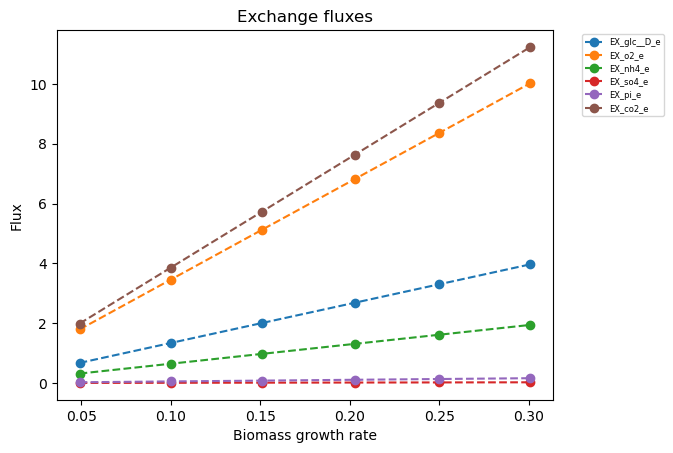

In [6]:
# Exchange fluxes plot
GR_range = all_fluxes_glc_max['BIOMASS_RT_CLIM']
plt.plot(GR_range, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [10]:
PPP_fluxes = all_fluxes_glc_max[['BIOMASS_RT_CLIM', 'EX_glc__D_e', 'PKETF_c', 'G6PDH2i_c', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m']] #'XPK' (Xylulose-5-phosphate phosphoketolase) and 'FPK' (Fructose-6-phosphate phosphoketolase) - couldnt find these from iRhto model 
# Change G6PDH2rp column name to oxpp 
PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2i_c': 'oxpp'})
PPP_fluxes

,BIOMASS_RT_CLIM,EX_glc__D_e,PKETF_c,oxpp,TKT1_c,TALA_c,TKT2_c,PYRDC_c,PDH_m
0,0.049,-0.672576,0.0,0.353329,0.116176,0.116176,0.103821,0.0,0.738091
1,0.1,-1.339692,0.0,0.721081,0.237093,0.237093,0.21188,0.0,1.440482
2,0.151,-2.006807,0.0,1.088832,0.358011,0.358011,0.319938,0.0,2.142874
3,0.203,-2.687003,0.0,1.463793,0.481299,0.481299,0.430115,0.0,2.859037
4,0.25,-3.301795,0.0,1.802701,0.592733,0.592733,0.529699,0.0,3.506339
5,0.301,-3.968911,0.0,2.170452,0.713651,0.713651,0.637757,0.0,4.20873


In [11]:
ATPM_ACITL_fluxes = all_fluxes_glc_max[['ATPM_c', 'ACITL_c', 'ACS_n']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes 

,ATPM_c,ACITL_c,ACS_n
0,1.189,0.270275,0.0
1,1.189,0.551582,0.0
2,1.189,0.832889,0.0
3,1.189,1.119712,0.0
4,1.189,1.378955,0.0
5,1.189,1.660262,0.0


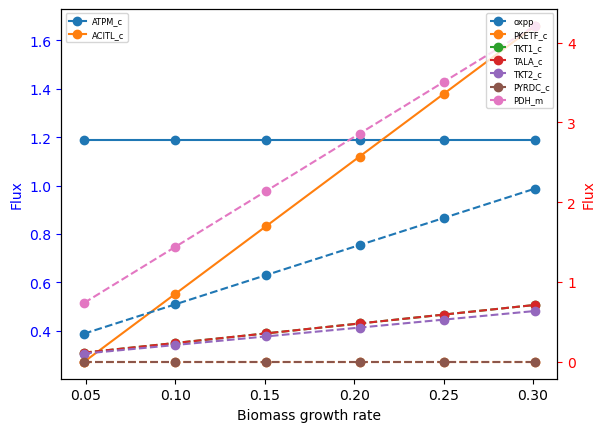

In [12]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_glc_max['BIOMASS_RT_CLIM']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM_c', 'ACITL_c']])
y2 = np.abs(PPP_fluxes[['oxpp', 'PKETF_c', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM_c', 'ACITL_c'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'PKETF_c', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

In [13]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\iRhto_results\\iRhto_all_fluxes_glc_max.xlsx') as excel_writer:
#     all_fluxes_glc_max.to_excel(excel_writer, sheet_name='Growth rates 0.05-0.3', index=True)

In [11]:
# #  Get all flux values separately for dif growth rates, make them to a csv file
# for i in range(len(glucose_uptakes)):
#     all_fluxes_dif_glucose_uptakes.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\iRhto_results\\iRhto_csv\\iRhto_flux_values_glucose_uptake_{glucose_uptakes[i]}.csv', index=True)

In [12]:
# #Calculating the missing glucose uptake form lab data, when growth rate is 0.25
# growth_rates = np.array([0.049, 0.100, 0.151, 0.203, 0.25, 0.301]) 
# glucose_uptakes= np.array([-0.476, -1.114, -1.648, -2.305, -2.6619851, -3.1])

# Getting the missing glucose uptake when GR is 0.25
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(growth_rates[:, None], glucose_uptakes)

# y = lm.coef_ * 0.25 + lm.intercept_
# y